<a href="https://colab.research.google.com/github/vishakhadhonde9/Task-3-Exploratory-Data-Analysis-Retail/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3]Exploratory Data Analysis-Retail

###Problem Statement-
Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'.   
As manager, try to find out the weak areas where you can work to make more profit.     
What all business problems you can derive by exploring the data?  

#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Load and read the dataset

In [ ]:
dataset = pd.read_csv("/content/SampleSuperstore.csv")
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
dataset.shape

(9994, 13)

In [ ]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Data Visualization

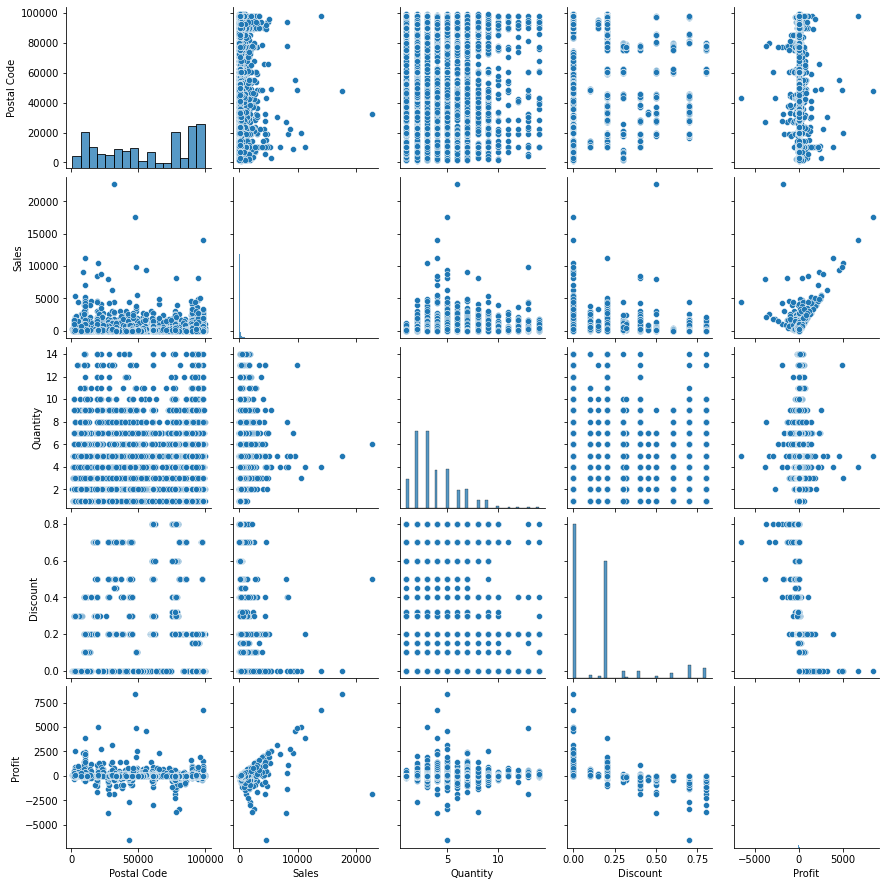

In [ ]:
sns.pairplot(dataset)

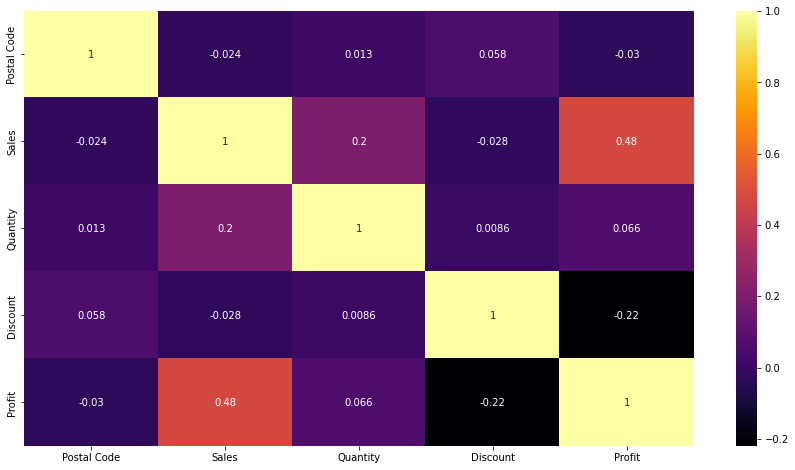

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (15,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'inferno')
plt.show()

In [ ]:
df=dataset.select_dtypes(include=[np.number])

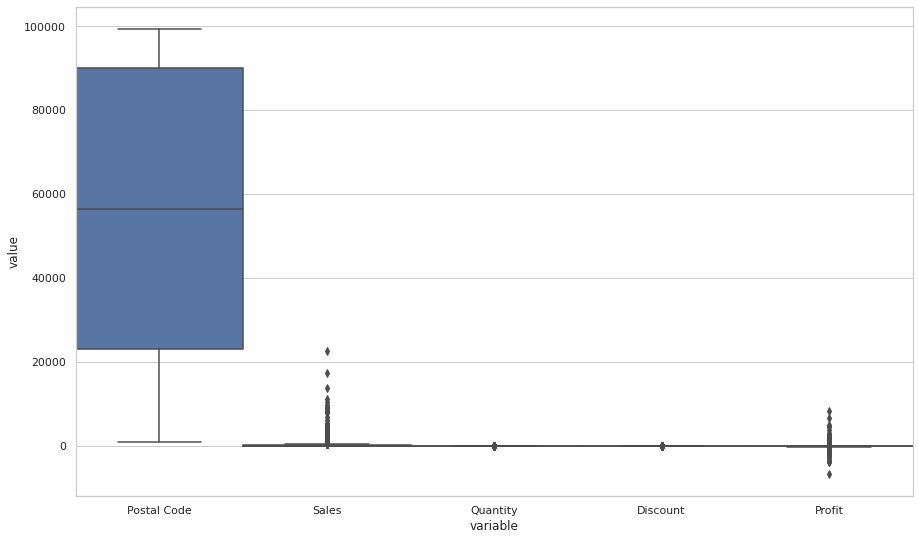

In [ ]:
plt.figure(figsize=[15,9])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df), width=1)
plt.show()

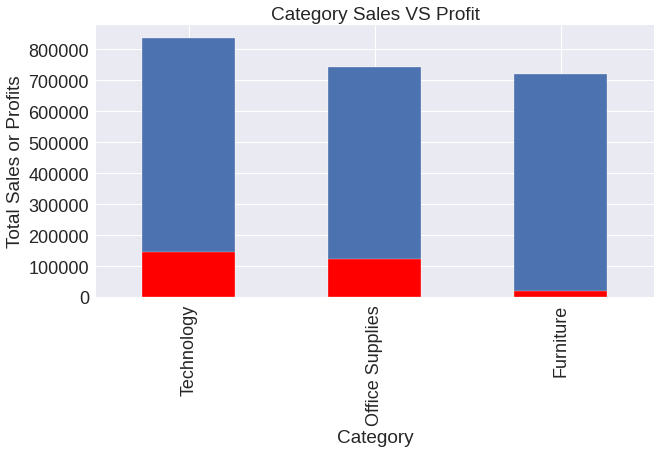

In [ ]:
category_s = dataset.groupby("Category").Sales.sum().nlargest(n=100)
category_p= dataset.groupby("Category").Profit.sum().nlargest(n=100)

plt.style.use('seaborn')
category_s.plot(kind = 'bar', figsize = (10,5), fontsize = 18)
category_p.plot(kind = 'bar', figsize = (10,5), fontsize = 18, color='red')
plt.xlabel('Category', fontsize = 19)
plt.ylabel('Total Sales or Profits', fontsize = 19)
plt.title("Category Sales VS Profit", fontsize = 19)
plt.show()

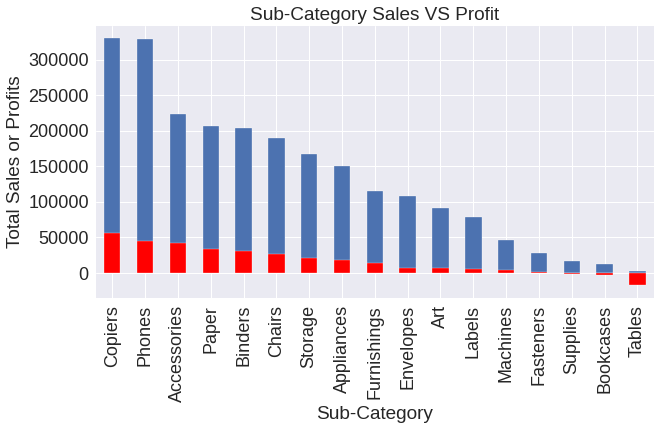

In [ ]:
subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n=100)
subcategory_p= dataset.groupby("Sub-Category").Profit.sum().nlargest(n=100)

plt.style.use('seaborn')
subcategory_s.plot(kind = 'bar', figsize = (10,5), fontsize = 18)
subcategory_p.plot(kind = 'bar', figsize = (10,5), fontsize = 18, color='red')
plt.xlabel('Sub-Category', fontsize = 19)
plt.ylabel('Total Sales or Profits', fontsize = 19)
plt.title("Sub-Category Sales VS Profit", fontsize = 19)
plt.show()

#Category wise sales in Each region



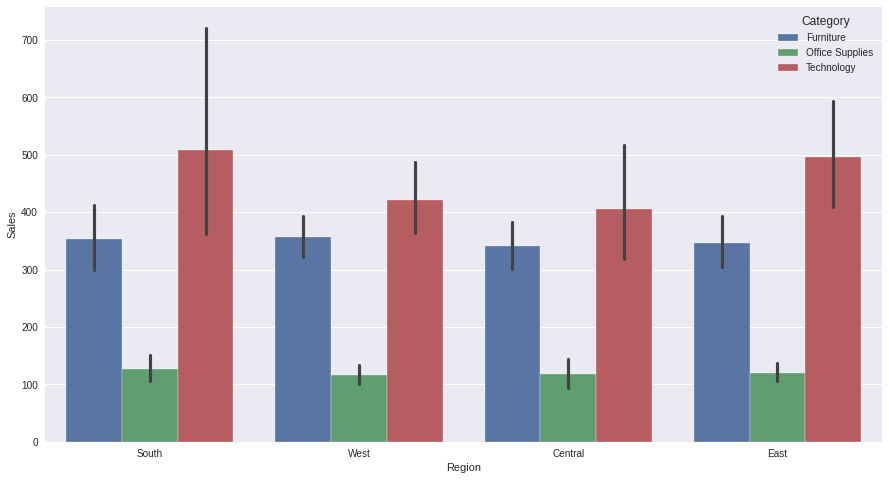

In [ ]:
plt.figure(figsize=[15, 8])
sns.barplot(x="Region", y="Sales", hue="Category", data=dataset)


#Segment wise count and Sales







/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x576 with 0 Axes>

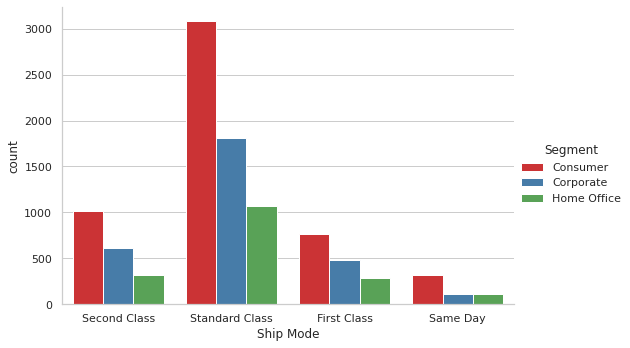

In [ ]:
plt.figure(figsize=[15, 8])
sns.catplot("Ship Mode", hue="Segment", data=dataset, kind="count", aspect=1.5, palette="Set1")


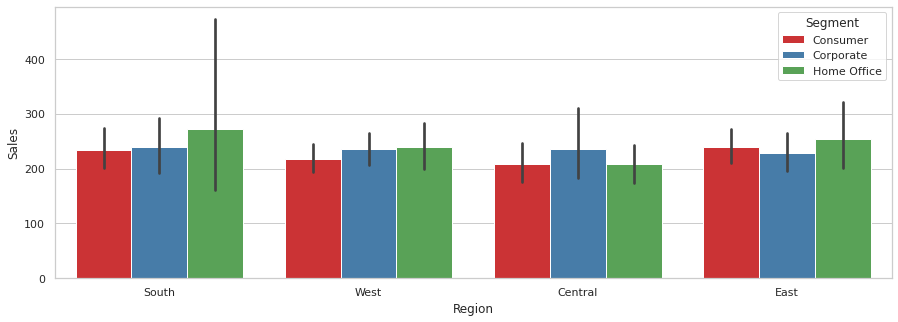

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Region", y="Sales", hue="Segment", data=dataset, palette="Set1")


In [ ]:
#sub-category vs sales

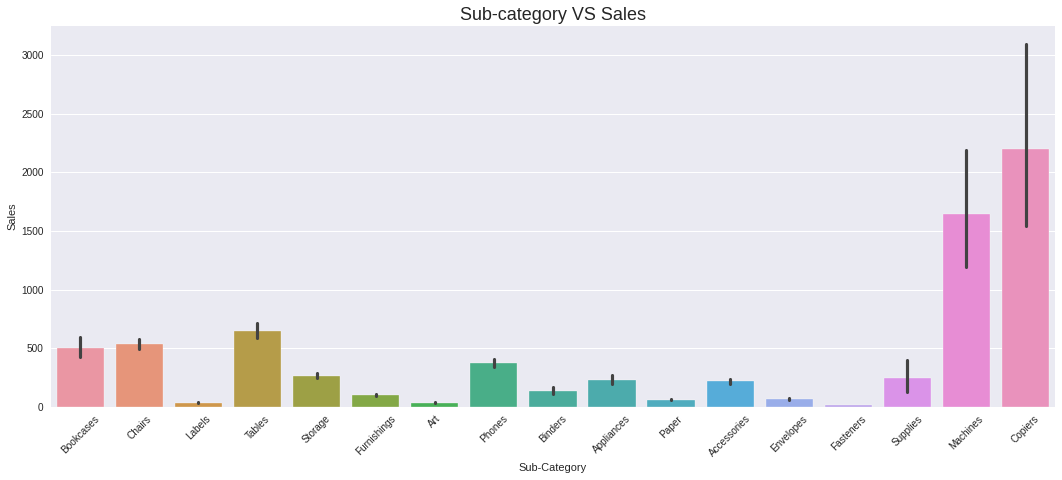

In [ ]:
plt.figure(figsize = (18,7))
sns.barplot(x="Sub-Category", y="Sales", data=dataset)
plt.title('Sub-category VS Sales', size=18)
ax = plt.xticks(rotation=45)

category wise profit 

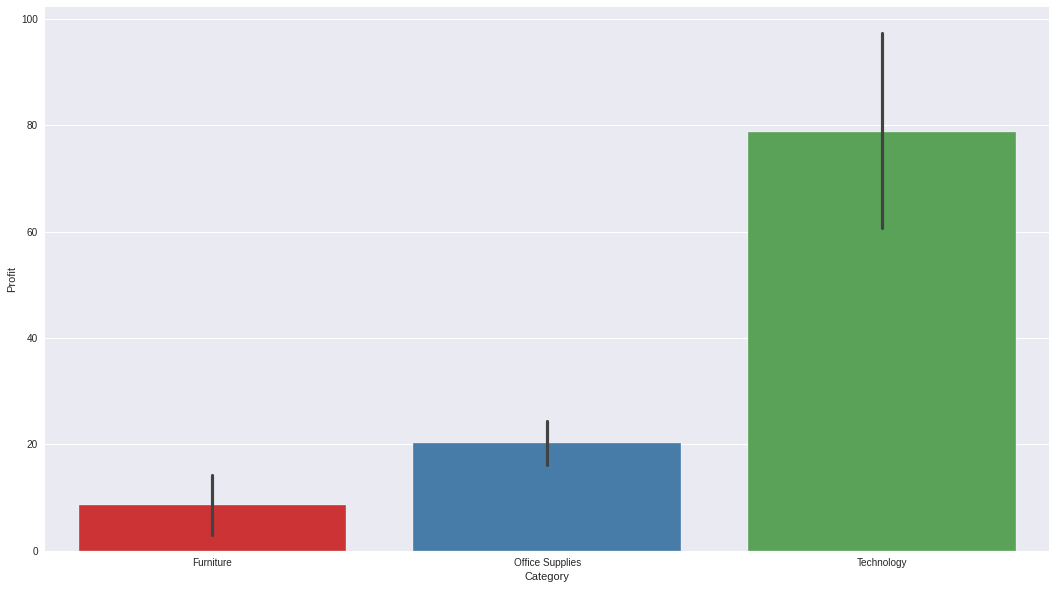

In [ ]:
plt.figure(figsize=[18,10])
sns.barplot(x="Category", y="Profit", data=dataset, palette="Set1")

#Comparision of Profit with Other columns

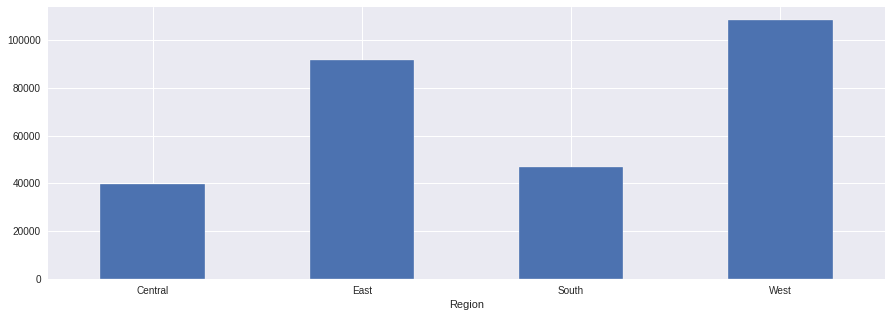

In [ ]:
#Region wise
plt.figure(figsize=(15, 5))
data_region=dataset.groupby(["Region"])["Profit"].sum()
data_region.sort_values(ascending=False)
data_region.plot.bar()
plt.xticks(rotation=360)
plt.show()

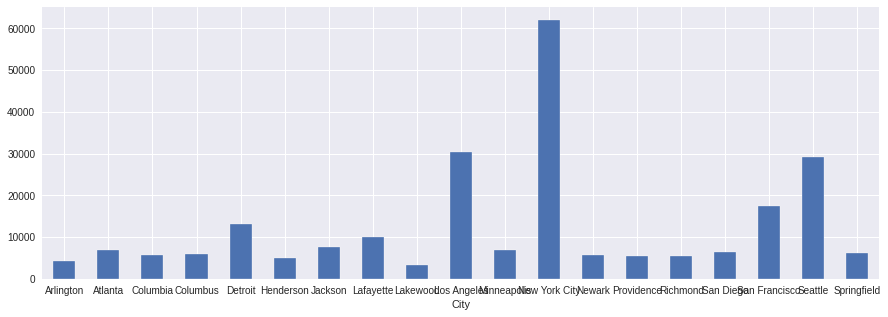

In [ ]:
#city wise
plt.figure(figsize=(15, 5))
data_city=dataset.groupby(["City"])["Profit"].sum()
a=data_city[data_city>3000]
a.sort_values(ascending=False)
a.plot.bar()
plt.xticks(rotation=360)
plt.show()

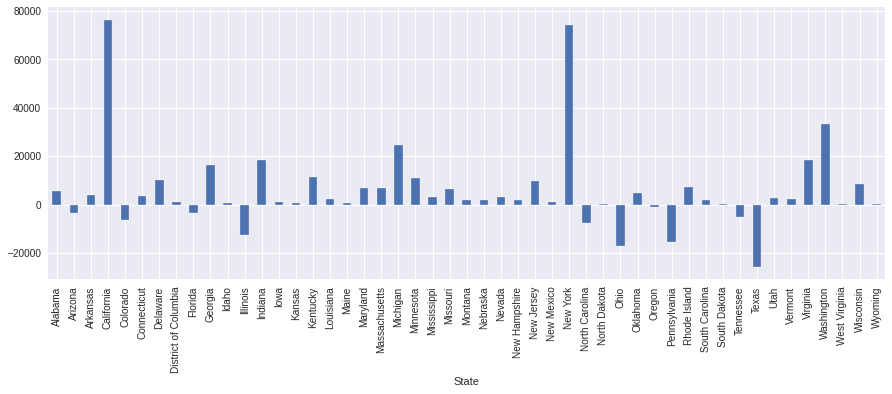

In [ ]:
#State wise
plt.figure(figsize=(15, 5))
data_state=dataset.groupby(["State"])["Profit"].sum()
data_state.sort_values(ascending=False)
data_state.plot.bar()
plt.xticks(rotation=90)
plt.show()

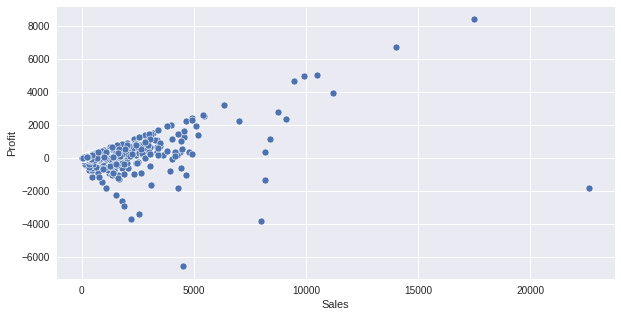

In [ ]:
#Comparision respective to sales
#Region wise
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dataset, x="Sales", y="Profit")
plt.show()

#Result/conclusion:

Correlation between Profit and Sales represented by heap map and they are highly correlated.  
Over less quantity of product also sales high.           
Mode of shopping doesn't affect on sale.